In [182]:
#Importing all the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve


#Viewing all rows and columns 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Step-1 Understanding and loading the data

In [183]:
#Loading the dataset
lead=pd.read_csv('Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [184]:
#Checking the rows and columns in the dataset
lead.shape

(9240, 37)

In [185]:
#Checking and understanding the data
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [186]:
#Understanding the distribution of the data
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Data Cleaning

In [187]:
# Getting the number of null values in each column and then descending with the highest number.
lead.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [188]:
#Getting the percentage of null values in each column and rounding off to 2 digits for better decision making,precise analysis.
check=round(lead.isnull().mean()*100,2).sort_values(ascending = False)
check

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [189]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [190]:
#As we saw above may select values are present.hence,replacing it with Nan
lead = lead.replace('Select', np.nan)

In [191]:
check1=round(lead.isnull().mean()*100,2).sort_values(ascending = False)
print('here we find multiple missing values and it should be treated well')
check1


here we find multiple missing values and it should be treated well


How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [192]:
lead.columns[lead.isnull().mean()>0.45]

Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], dtype='object')

In [193]:
#Deleting the columns with null values
lead=lead.drop(lead.columns[lead.isnull().mean()>0.45],axis=1)

In [194]:
lead.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [195]:
# imputing  "India" as its common occurance in Country Column
lead['Country']=lead['Country'].replace(np.nan,'India')

In [196]:
# Finding the Labels contains in the Specialization Variable
lead['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [197]:
# Imputing  "Finance Management" as its common occurance in Specialization Column
lead['Specialization']=lead['Specialization'].replace(np.nan,'Finance Management')

In [198]:
# Finding the Labels contains in the "What is your current occupation" Variable
lead['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [199]:
# Imputing  "Unemployed" as its common occurance in What is your current occupation Column
lead['What is your current occupation']=lead['What is your current occupation'].replace(np.nan,'Unemployed')

In [200]:
# Finding the Labels contains in the "Last Activity Variable
lead['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [201]:
# imputing  "Google" as its common occurance in Lead Source Column
lead['Lead Source']=lead['Lead Source'].replace(np.nan,'Google')

In [202]:
# here we have found that google and Google is same just a typo hence we replaced it google to Google.
lead['Lead Source']=lead['Lead Source'].replace('google','Google')

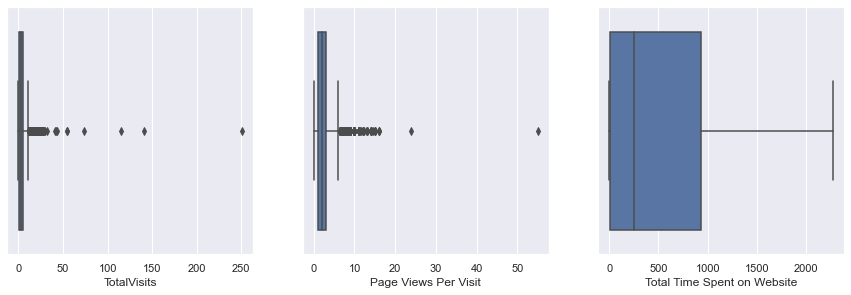

In [203]:
#Checking for outliers in the given dataset
plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
sns.boxplot(lead['TotalVisits'])
plt.subplot(2,3,2)
sns.boxplot(lead['Page Views Per Visit'])
plt.subplot(2,3,3)
sns.boxplot(lead['Total Time Spent on Website'])
plt.xlabel('Total Time Spent on Website')
plt.show()

We can see from above that the outlir exists for totalvisits and page views per visit.Hence,have to treat the outlier correctly.

In [204]:
# Imputing Median as it is a Continueous type
lead['TotalVisits']=lead['TotalVisits'].fillna(lead['TotalVisits'].median())
lead['Page Views Per Visit']=lead['Page Views Per Visit'].fillna(lead['Page Views Per Visit'].median())

In [205]:
check2=round(lead.isnull().mean()*100,2).sort_values(ascending = False)
check2


City                                             39.71
Tags                                             36.29
What matters most to you in choosing a course    29.32
Last Activity                                     1.11
Prospect ID                                       0.00
Magazine                                          0.00
A free copy of Mastering The Interview            0.00
I agree to pay the amount through cheque          0.00
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
X Education Forums                                0.00
Newspaper Article                                 0.00
Search                                            0.00
Lead Number                                       0.00
What is yo

In [206]:
lead.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [207]:
lead.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [208]:
lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [209]:
# Dropping "What matters most to you in choosing a course" as we have almost same value for colums
lead.drop('What matters most to you in choosing a course',1,inplace=True)


In [210]:
lead['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [211]:
# Imputing "Email Opened" as its common occurance in Last Activity Column
lead['Last Activity']=lead['Last Activity'].fillna('Email Opened')

In [212]:
#On Checking the data dropping tags as it is not required and it is added by other team
lead.drop('Tags',1,inplace=True)

In [213]:
# making lead number as index and dropping the prospect id as it is not required
lead=lead.set_index('Lead Number')
lead.drop(['Prospect ID'],1,inplace=True)

In [214]:
# Storing data in two separate list with dtype object and dtype int 
column_obj=list(lead.loc[:, lead.dtypes == np.object].columns)
column_num=list(lead.loc[:, lead.dtypes == np.int64].columns)
column_num+=(list(lead.loc[:, lead.dtypes == np.number].columns))
print('columns with object dtype \n {} \n \n columns with number dtype \n {}'.format(column_obj,column_num))

columns with object dtype 
 ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'] 
 
 columns with number dtype 
 ['Converted', 'Total Time Spent on Website', 'TotalVisits', 'Page Views Per Visit']


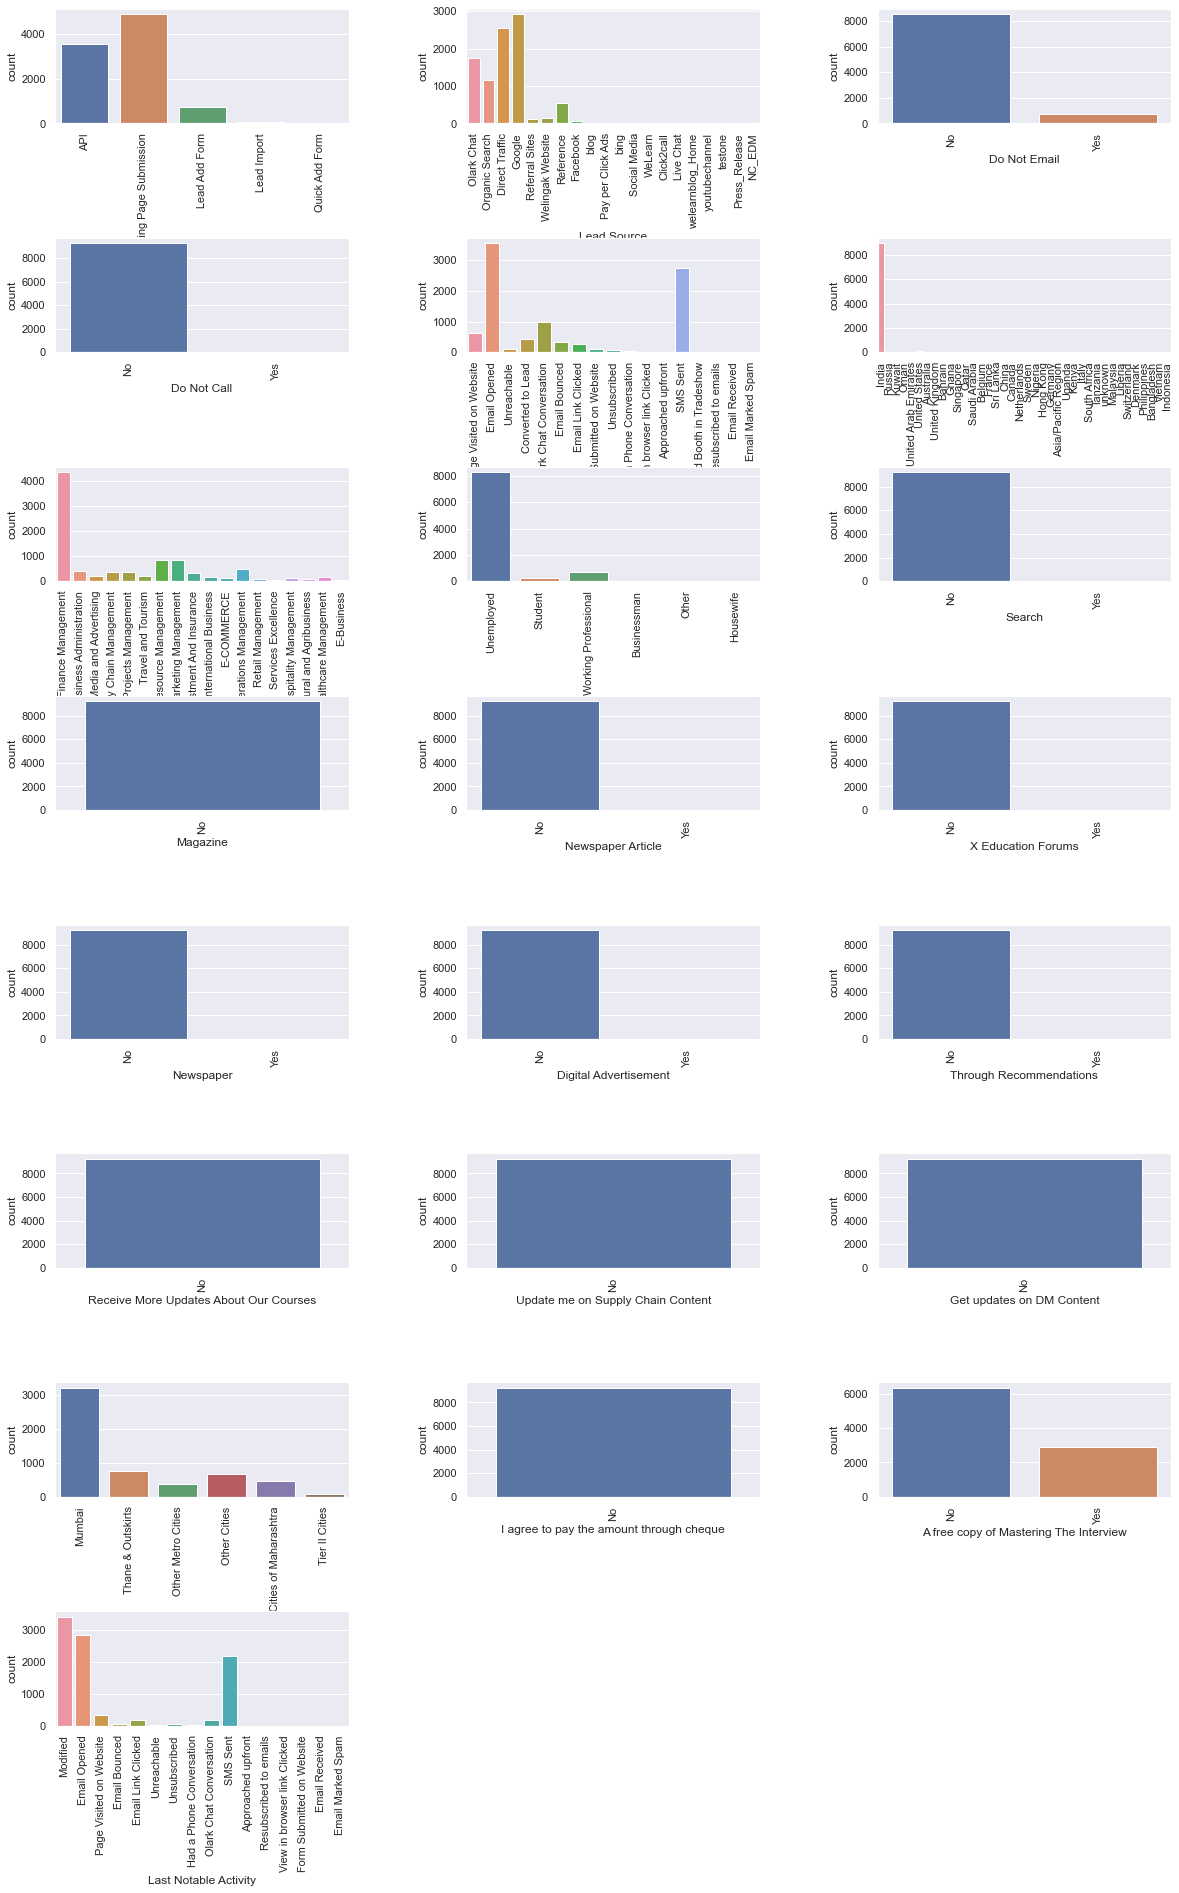

In [215]:
# Understanding the distribution and skewness of object type.
plt.figure(figsize=(20,40))
sns.set()
plt.subplots_adjust(wspace=.4,hspace=1 )
for i in enumerate(column_obj):
    plt.subplot(10,3, i[0]+1)
    sns.countplot(i[1],data=lead) 
    plt.xticks(rotation=90)
plt.show()

# Insights
We can see that there are many colums which are highly skewed.These columns can be removed as this will not help in model building.


In [216]:
# Removing high skewed columns
lead=lead.drop(['What is your current occupation','Do Not Call','Do Not Email','Country','Search',\
                      'X Education Forums','Newspaper','Newspaper Article','Through Recommendations','Digital Advertisement'],1)

In [217]:
# Droping those variables which contains two labels but one is very High and another is very less number of labels.
lead=lead.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',\
                      'Get updates on DM Content','I agree to pay the amount through cheque', ],1)
column_obj=lead.loc[:, lead.dtypes == np.object].columns

In [218]:
# changing categories which are occured less than 1000
col_dict_ls=dict(lead['Lead Source'].value_counts()<1000)

# labels which are occured less like Reference,Reffereal site we can impute to 'Other'
for i in col_dict_ls.keys():
    if col_dict_ls[i]==True:
        lead['Lead Source']=lead['Lead Source'].replace(i,'Other')

In [219]:
# Changing categories which are occured less than 300
col_dict_la=dict(lead['Last Activity'].value_counts()<300)
# labels which are occured less like Resubscribed to emails ,Visited Booth in Tradeshow...those are impute to 'Other'

for i in col_dict_la.keys():
    if col_dict_la[i]==True:
        lead['Last Activity']=lead['Last Activity'].replace(i,'Other')

In [220]:
# Changing categories which are occured less than 350
col_dict_spec=dict(lead['Specialization'].value_counts()<350)
# labels which are occured less like E-Business,Retail Management we can impute to 'Other'

for i in col_dict_spec.keys():
    if col_dict_spec[i]==True:
        lead['Specialization']=lead['Specialization'].replace(i,'Other')


# Exploratory Data Analysis

In [221]:
# Univariate Analysis --- Categorical

cat_var=lead.loc[:, lead.dtypes == np.object].columns
cat_var

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity'], dtype='object')

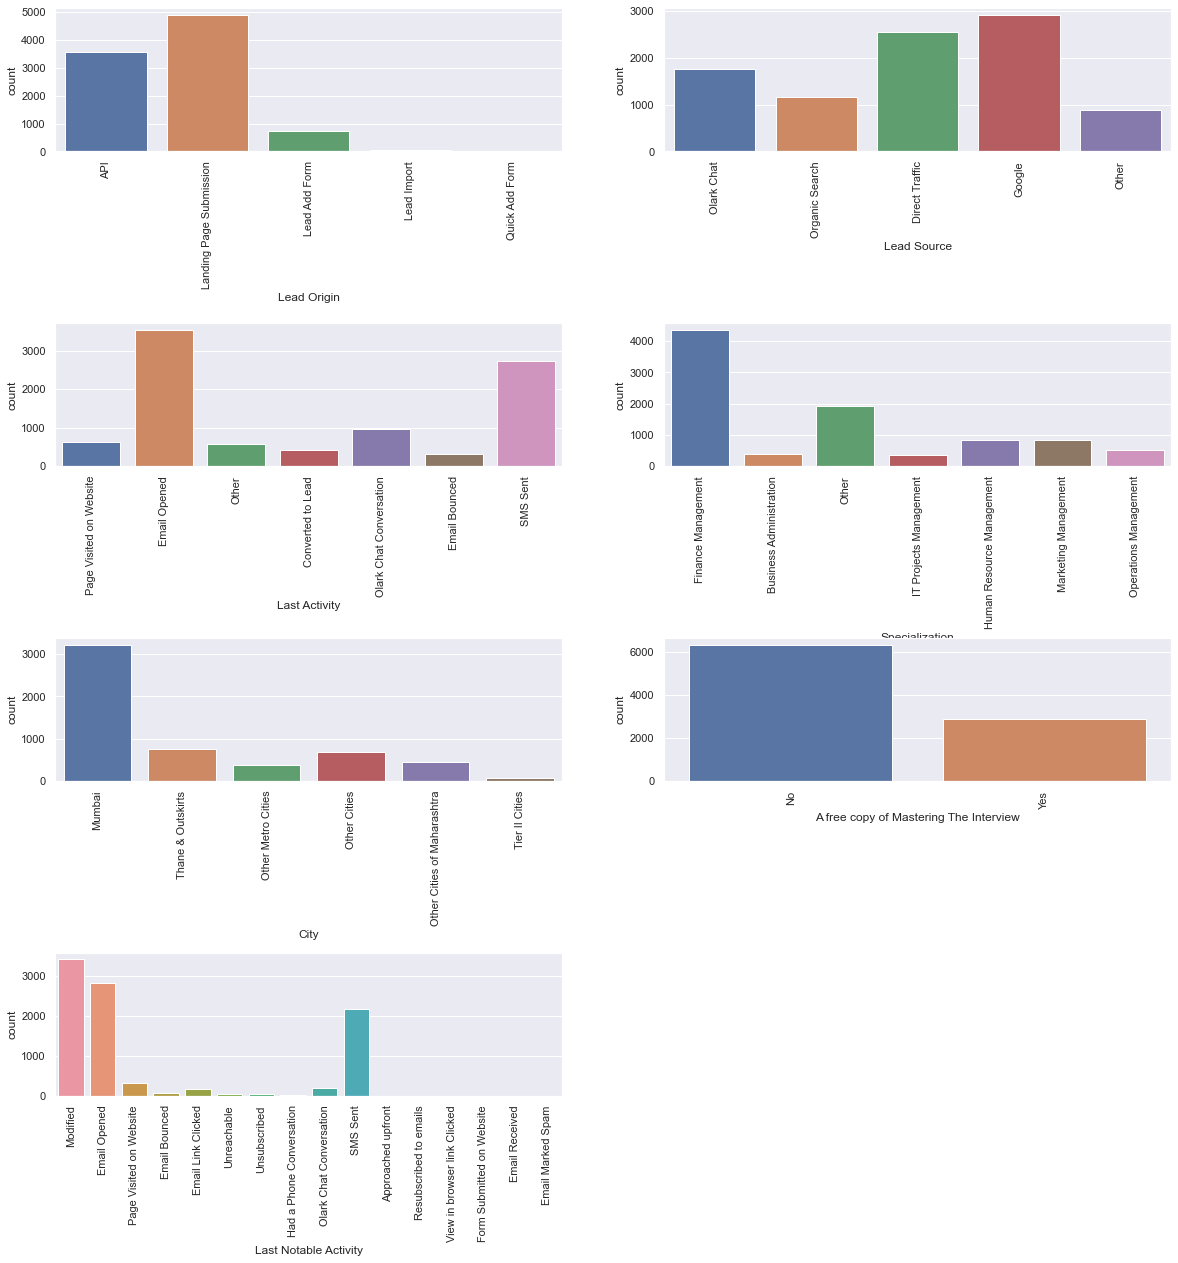

In [222]:
plt.figure(figsize=(20,20))
sns.set()
plt.subplots_adjust(wspace=.2,hspace=1.2 )
for i in enumerate(column_obj):
    plt.subplot(4,2, i[0]+1)
    sns.countplot(i[1],data=lead)
    plt.xticks(rotation=90)
plt.show()


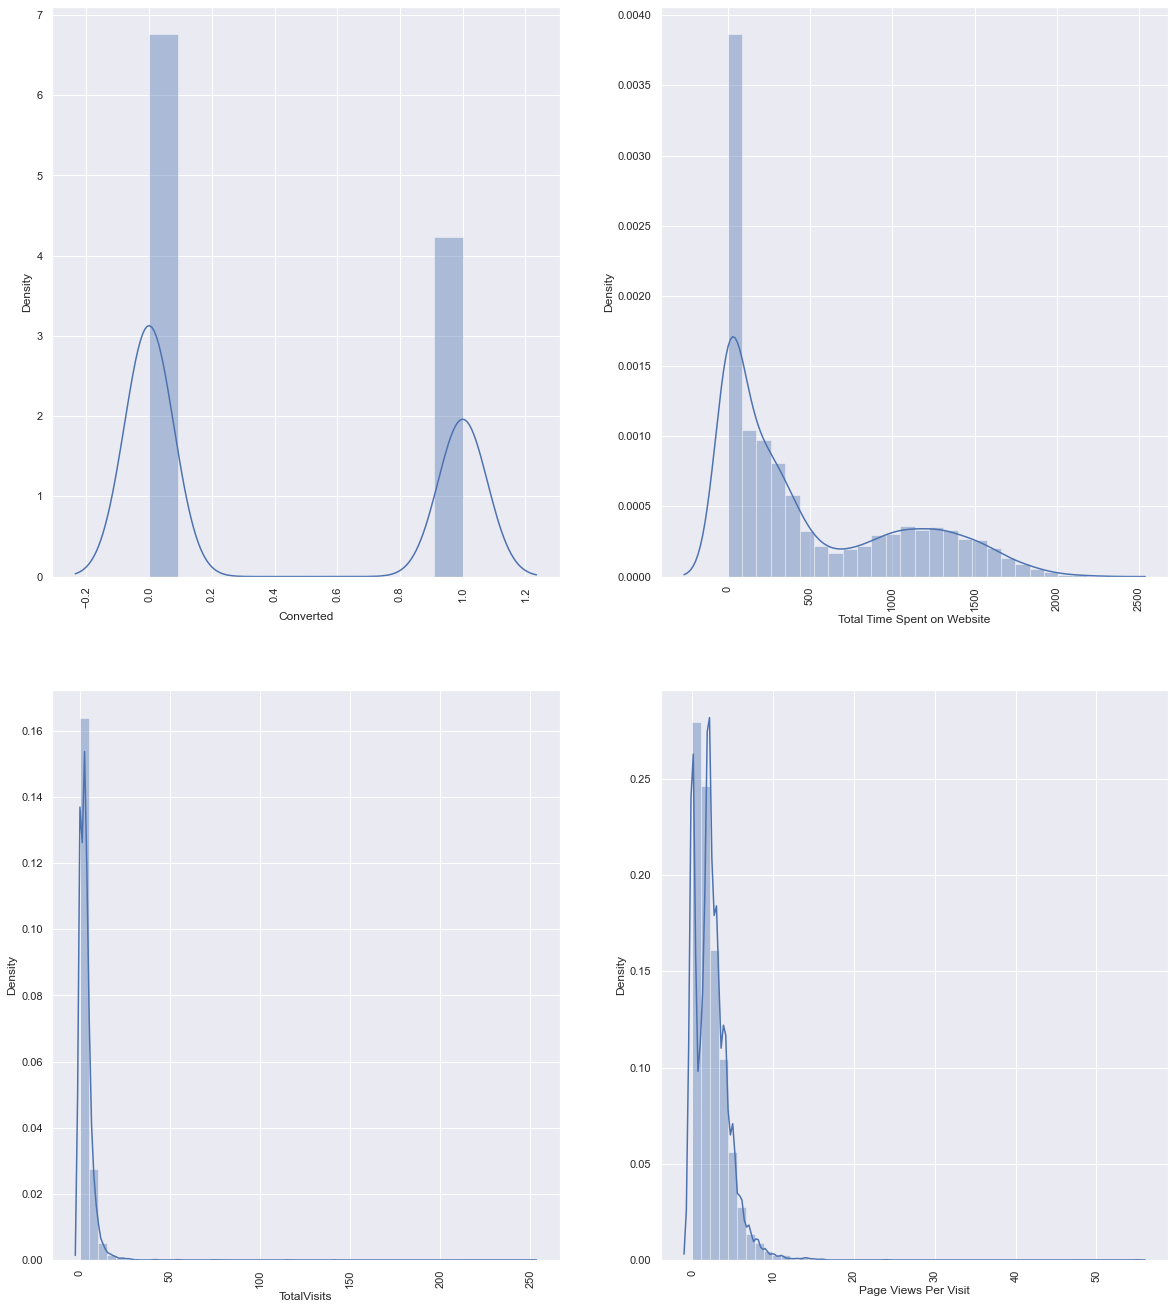

In [223]:
#Uni-variate Analysis --- Continuous

plt.figure(figsize=(20,20))
plt.subplots_adjust(bottom=.01)
for i in enumerate(column_num):
    
    plt.subplot(2,2, i[0]+1)
    sns.distplot(lead[i[1]])
    
    plt.xticks(rotation=90)

plt.show()


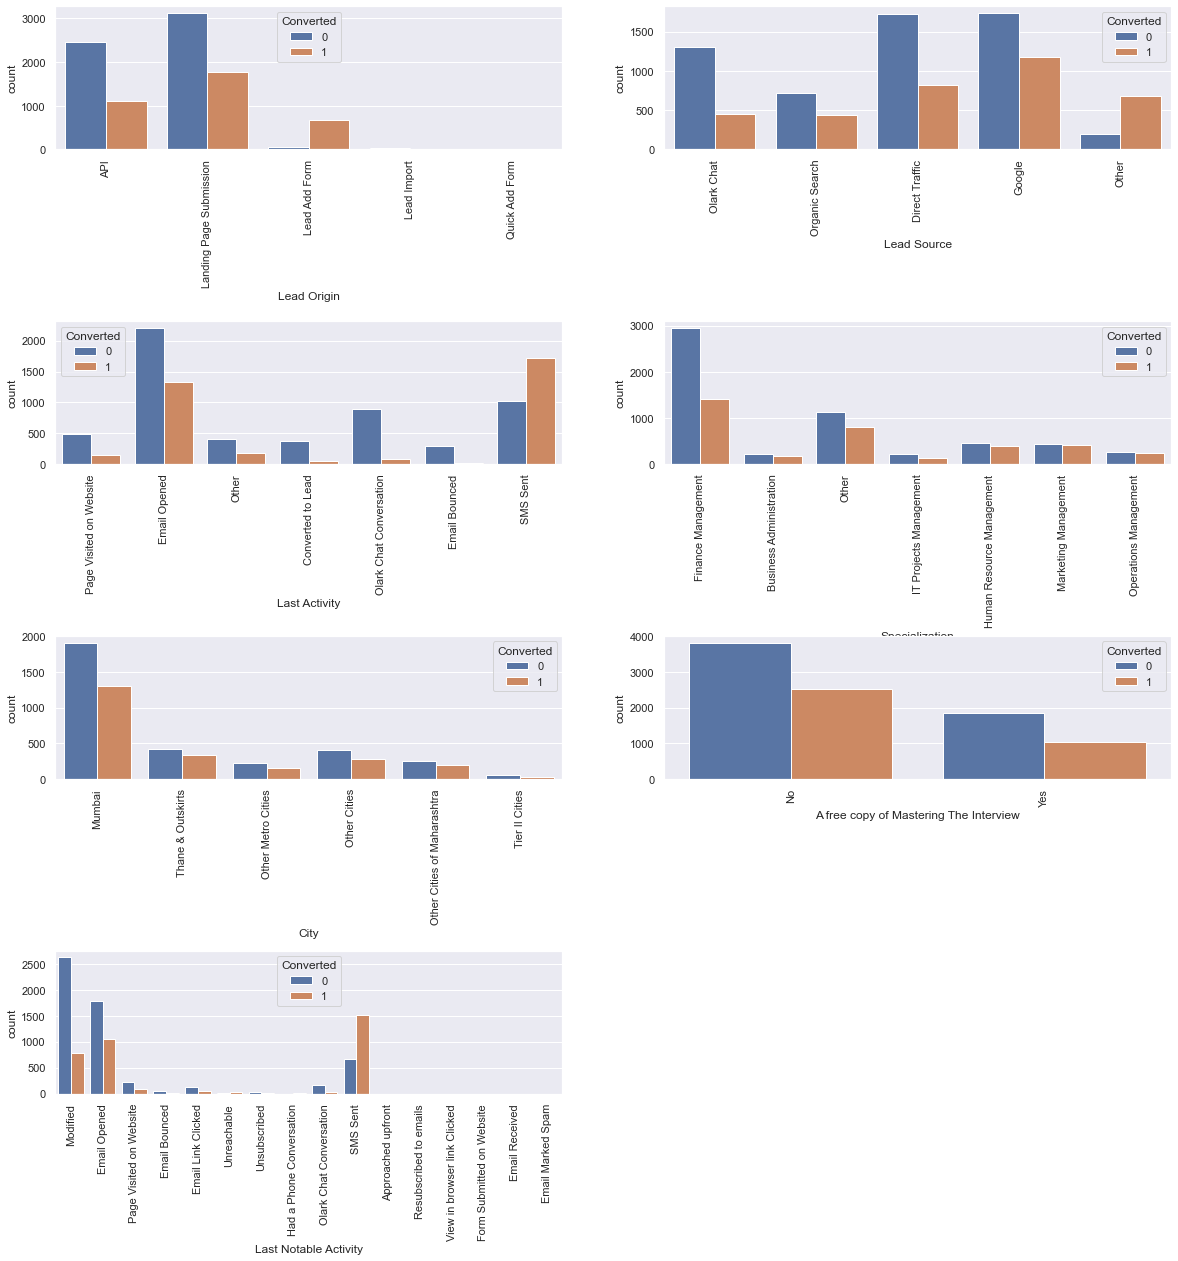

In [224]:
# Bivariate Analysis -- Based on target column converted

plt.figure(figsize=(20,20))
plt.subplots_adjust(wspace=.2,hspace=1.2 )
for i in enumerate(column_obj):
    plt.subplot(4,2, i[0]+1)
    sns.countplot(x = i[1],hue = 'Converted', data = lead)
    plt.xticks(rotation=90)
plt.show()




# Data Preparation and Features Selection

In [225]:
lead.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,City,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,
660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Finance Management,NaN,No,Modified
660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,NaN,No,Email Opened
660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Mumbai,Yes,Email Opened
660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other,Other,Mumbai,No,Modified
660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Finance Management,Mumbai,No,Modified


In [226]:
# mapping of columns

lead['A free copy of Mastering The Interview']=lead['A free copy of Mastering The Interview'].apply(lambda x: 1 if x=='Yes' else 0)


In [227]:
# Dropping the Last Notable Activity as it is mostly same Last Activity
lead.drop('Last Notable Activity',1,inplace=True)

In [228]:
# Dummy creation 
dummies=pd.get_dummies(lead)
dummies.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,0,0.0,0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
660728,0,5.0,674,2.5,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
660727,1,2.0,1532,2.0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
660719,0,1.0,305,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
660681,1,2.0,1428,1.0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [229]:
# dropping columns based on analysis

dummies=dummies.drop(['A free copy of Mastering The Interview','Lead Origin_Lead Add Form','Lead Source_Organic Search','Last Activity_Email Opened','Specialization_Operations Management'],1)


# Splitting data based on test and training sets

In [230]:
X=dummies.iloc[:,1:]
y=dummies[['Converted']]

In [231]:
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=.7,test_size=.3,random_state=1)

In [232]:
scaler=StandardScaler()
X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']]=\
scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])

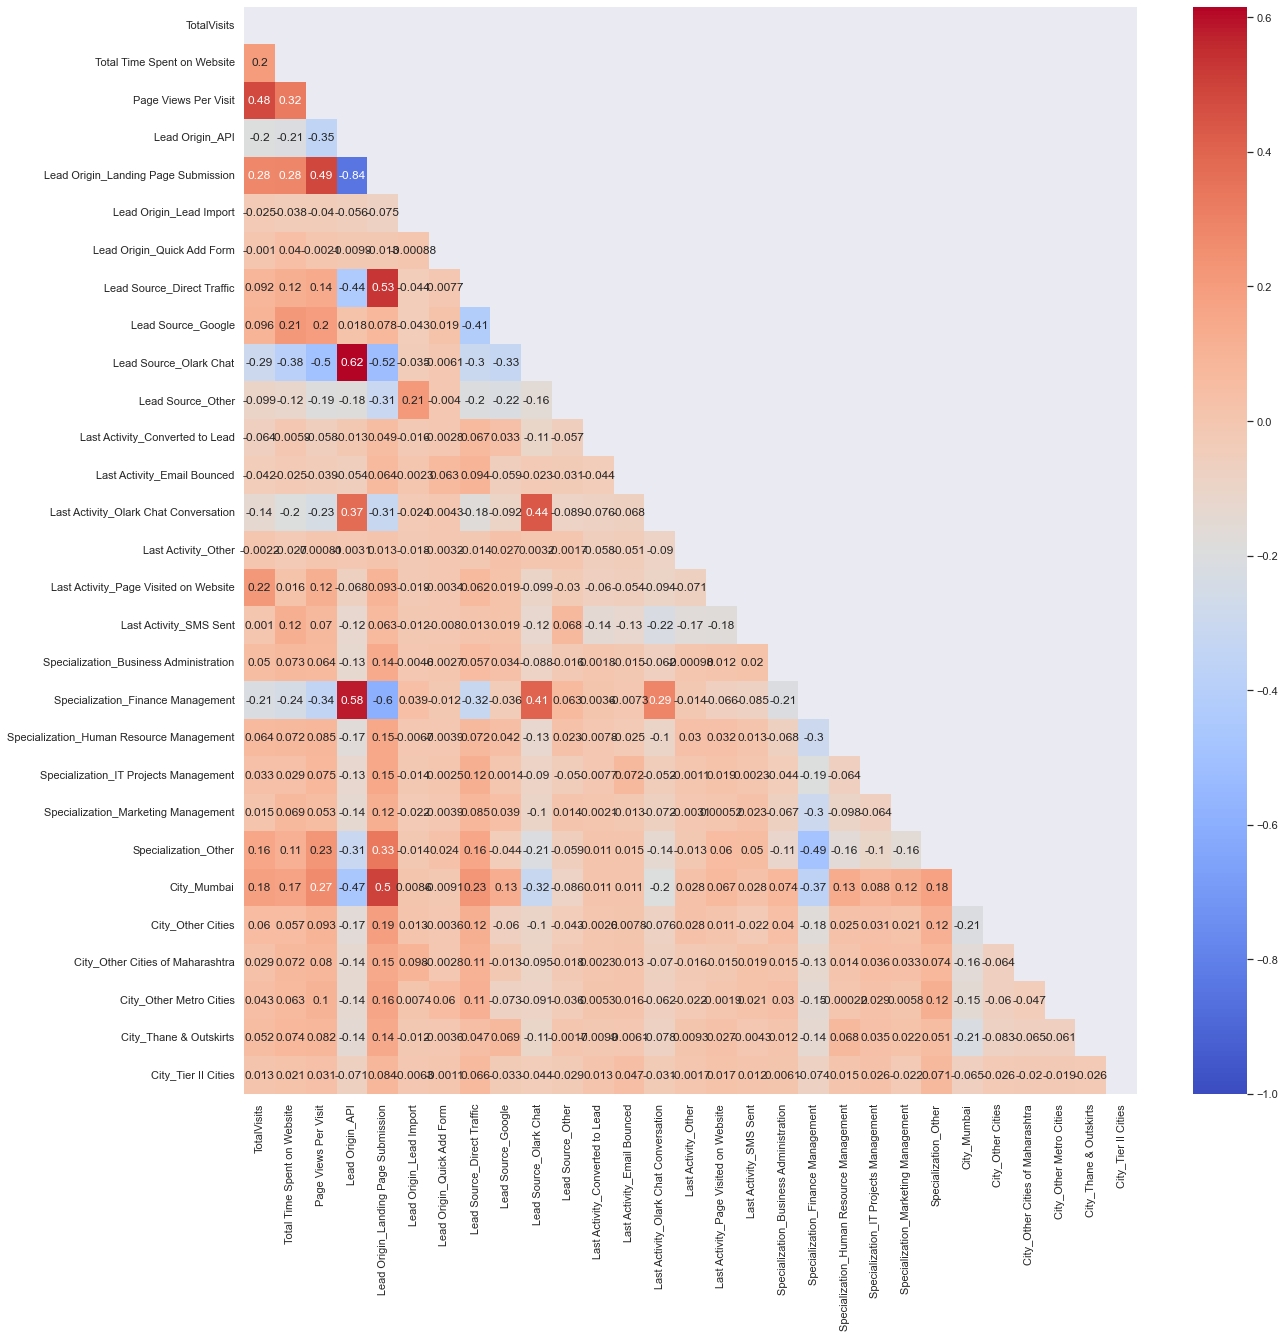

In [263]:

# Finding the Correlation using HeatMap
plt.figure(figsize = (20, 20))
mask = np.zeros(X_train.corr().shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
sns.heatmap(X_train.corr(), annot = True, vmin=-1,cmap='coolwarm',mask=mask)
plt.show()



In [234]:
# Using rfe for features selection
logreg=LogisticRegression()

In [235]:
# Running RFE with the output number of the variable equal to 20
rfe=RFE(logreg,n_features_to_select=20)    # running RFE
rfe=rfe.fit(X_train,y_train)

In [236]:
rfe.support_

array([False,  True, False,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False, False, False, False,  True,  True,  True,  True,
        True,  True])

In [237]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 3),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Lead Origin_API', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 9),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', False, 8),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Other', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 4),
 ('Specialization_Finance Management', True, 1),
 ('Specialization_Human Resource Management', False, 6),
 ('Specialization_IT Projects Management', False, 7),
 ('Specialization_Marketing Management', False, 10),
 ('Specialization_Other', False, 5),
 ('Cit

In [238]:
# After used RFE here RFE selected these variables should be used for modeling
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_API', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import', 'Lead Source_Direct Traffic', 'Lead Source_Olark Chat', 'Lead Source_Other', 'Last Activity_Converted to Lead', 'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation', 'Last Activity_Other', 'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent', 'Specialization_Finance Management', 'City_Mumbai', 'City_Other Cities', 'City_Other Cities of Maharashtra', 'City_Other Metro Cities', 'City_Thane & Outskirts', 'City_Tier II Cities'], dtype='object')

In [239]:
# After used RFE here RFE selected these variables should not be used for modeling
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Quick Add Form', 'Lead Source_Google', 'Specialization_Business Administration', 'Specialization_Human Resource Management', 'Specialization_IT Projects Management', 'Specialization_Marketing Management', 'Specialization_Other'], dtype='object')

# Model-1

In [240]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2902.6
Date:                Sun, 16 Apr 2023   Deviance:                       5805.2
Time:                        19:05:14   Pearson chi2:                 6.68e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3507
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     2.7721      0.302      9.181      0.000       2.180       3.364
Total Time Spent on Website               1.0937      0.038     28.487      0.000       1.018       1.169
Lead Origin_API                          -3.6702      0.290    -12.635      0.000      -4.240      -3.101
Lead Origin_Landing Page Submission      -4.4847      0.305    -14.688      0.000      -5.083      -3.886
Lead Origin_Lead Import                  -4.3894      0.511     -8.589      0.000      -5.391      -3.388
Lead Source_Direct Traffic               -0.2943      0.084     -3.504      0.000      -0.459      -0.130
Lead Source_Olark Chat                    1.0090      0.118      8.519      0.000       0.777       1.241
Lead Source_Other                         0.0184      0.245      0.075      0.940      -0.462       0.498
Last Activity_Converted to Lead          -1.0372      0.197     -5.256      0.000      -1.424      -0.650
Last Activity_Email Bounced              -1.7974      0.281     -6.399      0.000      -2.348      -1.247
Last Activity_Olark Chat Conversation    -1.7419      0.170    -10.261      0.000      -2.075      -1.409
Last Activity_Other                      -0.2684      0.138     -1.951      0.051      -0.538       0.001
Last Activity_Page Visited on Website    -0.6148      0.143     -4.312      0.000      -0.894      -0.335
Last Activity_SMS Sent                    1.1123      0.075     14.820      0.000       0.965       1.259
Specialization_Finance Management        -0.2904      0.090     -3.224      0.001      -0.467      -0.114
City_Mumbai                               0.6969      0.139      5.005      0.000       0.424       0.970
City_Other Cities                         0.7923      0.171      4.640      0.000       0.458       1.127
City_Other Cities of Maharashtra          0.9615      0.195      4.931      0.000       0.579       1.344
City_Other Metro Cities                   0.6874      0.202      3.401      0.001       0.291       1.084
City_Thane & Outskirts                    0.7633      0.165      4.616      0.000       0.439       1.087
City_Tier II Cities                       0.6414      0.379      1.692      0.091      -0.102       1.384
=========================================================================================================
"""

In [241]:
# function to calculate vif
def vifcalc(df):
    vif = pd.DataFrame()

    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [242]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
2,Lead Origin_Landing Page Submission,11.03
14,City_Mumbai,5.56
1,Lead Origin_API,4.70
13,Specialization_Finance Management,3.38
5,Lead Source_Olark Chat,2.51
15,City_Other Cities,2.01
4,Lead Source_Direct Traffic,1.96
18,City_Thane & Outskirts,1.88
12,Last Activity_SMS Sent,1.72
16,City_Other Cities of Maharashtra,1.67


Lead Source_Other is insignificant because it has high p-value in presence of other variables so it should be dropped

In [243]:
col=col.drop('Lead Source_Other',1)

# Model-2

In [244]:
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2902.6
Date:                Sun, 16 Apr 2023   Deviance:                       5805.2
Time:                        19:07:39   Pearson chi2:                 6.68e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3507
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     2.7895      0.194     14.343      0.000       2.408       3.171
Total Time Spent on Website               1.0936      0.038     28.491      0.000       1.018       1.169
Lead Origin_API                          -3.6865      0.193    -19.063      0.000      -4.066      -3.307
Lead Origin_Landing Page Submission      -4.5015      0.208    -21.648      0.000      -4.909      -4.094
Lead Origin_Lead Import                  -4.3885      0.511     -8.590      0.000      -5.390      -3.387
Lead Source_Direct Traffic               -0.2947      0.084     -3.516      0.000      -0.459      -0.130
Lead Source_Olark Chat                    1.0079      0.117      8.579      0.000       0.778       1.238
Last Activity_Converted to Lead          -1.0374      0.197     -5.257      0.000      -1.424      -0.651
Last Activity_Email Bounced              -1.7981      0.281     -6.402      0.000      -2.349      -1.248
Last Activity_Olark Chat Conversation    -1.7418      0.170    -10.261      0.000      -2.075      -1.409
Last Activity_Other                      -0.2681      0.137     -1.950      0.051      -0.538       0.001
Last Activity_Page Visited on Website    -0.6146      0.143     -4.311      0.000      -0.894      -0.335
Last Activity_SMS Sent                    1.1120      0.075     14.832      0.000       0.965       1.259
Specialization_Finance Management        -0.2903      0.090     -3.223      0.001      -0.467      -0.114
City_Mumbai                               0.6967      0.139      5.005      0.000       0.424       0.970
City_Other Cities                         0.7923      0.171      4.640      0.000       0.458       1.127
City_Other Cities of Maharashtra          0.9615      0.195      4.931      0.000       0.579       1.344
City_Other Metro Cities                   0.6877      0.202      3.402      0.001       0.292       1.084
City_Thane & Outskirts                    0.7633      0.165      4.615      0.000       0.439       1.087
City_Tier II Cities                       0.6412      0.379      1.692      0.091      -0.102       1.384
=========================================================================================================
"""

In [245]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
2,Lead Origin_Landing Page Submission,9.29
13,City_Mumbai,4.82
1,Lead Origin_API,4.26
12,Specialization_Finance Management,2.90
5,Lead Source_Olark Chat,2.48
4,Lead Source_Direct Traffic,1.96
14,City_Other Cities,1.83
17,City_Thane & Outskirts,1.70
11,Last Activity_SMS Sent,1.61
15,City_Other Cities of Maharashtra,1.56


In [246]:
col=col.drop('Lead Origin_Landing Page Submission',1)

# Model-3

In [247]:
X_train_sm=sm.add_constant(X_train[col])
logm3=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3290.9
Date:                Sun, 16 Apr 2023   Deviance:                       6581.8
Time:                        19:11:01   Pearson chi2:                 6.58e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2678
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.5401      0.116      4.658      0.000       0.313       0.767
Total Time Spent on Website               0.8902      0.035     25.377      0.000       0.821       0.959
Lead Origin_API                          -1.0278      0.108     -9.535      0.000      -1.239      -0.817
Lead Origin_Lead Import                  -0.7390      0.462     -1.598      0.110      -1.645       0.167
Lead Source_Direct Traffic               -0.9016      0.078    -11.615      0.000      -1.054      -0.749
Lead Source_Olark Chat                    0.6105      0.110      5.546      0.000       0.395       0.826
Last Activity_Converted to Lead          -1.3737      0.190     -7.224      0.000      -1.746      -1.001
Last Activity_Email Bounced              -1.7436      0.238     -7.320      0.000      -2.210      -1.277
Last Activity_Olark Chat Conversation    -1.8200      0.161    -11.312      0.000      -2.135      -1.505
Last Activity_Other                      -0.3078      0.126     -2.439      0.015      -0.555      -0.060
Last Activity_Page Visited on Website    -0.7951      0.133     -5.979      0.000      -1.056      -0.534
Last Activity_SMS Sent                    1.0165      0.069     14.625      0.000       0.880       1.153
Specialization_Finance Management        -0.2180      0.082     -2.668      0.008      -0.378      -0.058
City_Mumbai                              -0.8548      0.109     -7.809      0.000      -1.069      -0.640
City_Other Cities                        -0.7189      0.146     -4.920      0.000      -1.005      -0.433
City_Other Cities of Maharashtra         -0.6141      0.168     -3.646      0.000      -0.944      -0.284
City_Other Metro Cities                  -0.9526      0.177     -5.367      0.000      -1.300      -0.605
City_Thane & Outskirts                   -0.5847      0.139     -4.207      0.000      -0.857      -0.312
City_Tier II Cities                      -1.1190      0.367     -3.050      0.002      -1.838      -0.400
=========================================================================================================
"""

In [248]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
1,Lead Origin_API,3.55
11,Specialization_Finance Management,2.74
4,Lead Source_Olark Chat,2.46
3,Lead Source_Direct Traffic,1.75
12,City_Mumbai,1.75
10,Last Activity_SMS Sent,1.55
7,Last Activity_Olark Chat Conversation,1.53
0,Total Time Spent on Website,1.24
13,City_Other Cities,1.17
9,Last Activity_Page Visited on Website,1.16


In [249]:
# Prediciting values on ytrain
y_train_pred = logm3.predict(X_train_sm).values.reshape(-1)

In [250]:
y_train_pred_final = pd.DataFrame({'Converted':y_train['Converted'], 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.reset_index(drop=True, inplace=True)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.150275,609431
1,0,0.062701,631817
2,0,0.090297,596164
3,0,0.272935,646570
4,0,0.053981,643974


In [251]:
#  let's take 0.5 as Cutoff
y_train_pred_final['Converted_pred']=y_train_pred_final['Converted_Prob'].apply(lambda x : 1 if x>0.5 else 0)


In [252]:
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Converted_pred
0,0,0.150275,609431,0
1,0,0.062701,631817,0
2,0,0.090297,596164,0
3,0,0.272935,646570,0
4,0,0.053981,643974,0


In [253]:
# Finding the metrics like accuracy, sensitivity and specicity 
def metrices_(converted,predicted):
    cm1 = metrics.confusion_matrix(converted,predicted)
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    return accuracy,sensi,speci

In [254]:
acc,sensi,speci=metrices_(y_train_pred_final.Converted,y_train_pred_final.Converted_pred)

print('Accuracy: {}, Sensitivity {}, specitiy {}'.format(acc,sensi,speci))


Accuracy: 0.756648113790971, Sensitivity 0.6269261962692619, specitiy 0.8365817091454273


In [255]:
# Finding the Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Converted_pred )
confusion

array([[3348,  654],
       [ 920, 1546]], dtype=int64)

In [256]:
# Finding the TP, TN, FP, FN
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negative

In [257]:
# Calculate false postive rate -
print(FP/ float(TN+FP))

0.1634182908545727


In [258]:
# positive predictive value 
print (TP / float(TP+FP))

0.7027272727272728


In [259]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7844423617619494


In [260]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
#     plt.savefig('Roc.png',dpi=300,transparent=True)
    plt.show()
    

    return None

In [261]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

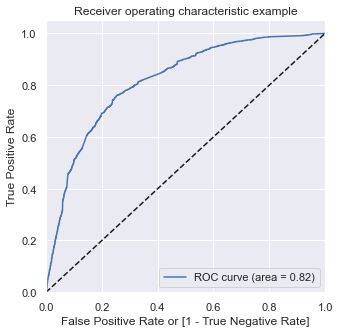

In [262]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

# Making Prediction on test data

In [264]:
X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']]=scaler.transform(X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])


In [266]:
#Adding constant
X_test_sm = sm.add_constant(X_test[col])
#Making prediction
y_test_pred = logm3.predict(X_test_sm)
y_test_pred[:10]

Lead Number
639211    0.241989
590711    0.813049
644174    0.477628
641392    0.499653
587955    0.790383
593130    0.097806
648319    0.062701
636722    0.938102
648231    0.907447
637858    0.368650
dtype: float64

In [267]:
# Converting y_pred to a dataframe which is an array
y_pred_test = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df['Lead Number'] = y_test_df.index

In [268]:
# Removing index for both dataframes to append them side by side 
y_pred_test.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)


In [271]:
# Appending y_test_df and y_pred_test
y_pred_final = pd.concat([y_test_df, y_pred_test],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})


In [272]:
y_pred_final.head()

,Converted,Lead Number,Converted_Prob
0,1,639211,0.241989
1,1,590711,0.813049
2,1,644174,0.477628
3,0,641392,0.499653
4,1,587955,0.790383


In [273]:
y_pred_final['final_test_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [274]:
y_pred_final.head()

,Converted,Lead Number,Converted_Prob,final_test_predicted
0,1,639211,0.241989,0
1,1,590711,0.813049,1
2,1,644174,0.477628,1
3,0,641392,0.499653,1
4,1,587955,0.790383,1


In [275]:
acc,sensi,speci=metrices_(y_pred_final.Converted,y_pred_final.final_test_predicted)
print('Accuracy: {}, Sensitivity {}, specitiy {}  '.format(acc,sensi,speci))

Accuracy: 0.7377344877344877, Sensitivity 0.7461187214611872, specitiy 0.7322599880739415  


In [276]:
# making new df with lead score
lead_scorer_df=pd.DataFrame()
df1=y_train_pred_final[['Lead Number','Converted_Prob']]
df2=y_pred_final[['Lead Number','Converted_Prob']]
lead_scorer_df=df1.append(df2,ignore_index=True)
# Assigning the value to the Lead Score by Multiplying 100
lead_scorer_df['Lead Score']=lead_scorer_df['Converted_Prob'].apply(lambda x: round((x*100),2))
# dropping Converted_Prob
lead_scorer_df.drop('Converted_Prob',1,inplace=True)
lead_scorer_df.head()

,Lead Number,Lead Score
0,609431,15.03
1,631817,6.27
2,596164,9.03
3,646570,27.29
4,643974,5.40


# Conclusion


From the above analysis we found that the variables that are the most effective are:
The total time spend on the Website.
Total number of visits.
lead source was: a. Google b. Direct traffic c. Organic search d. Olark Chat
last activity was: a. SMS b. Olark chat conversation
lead origin is Lead add format.